# Estrategia recomendacion brokers

## Autor: María Carrasco Meléndez, Raquel Fort Serra y Lucía Saiz Lapique

__Práctica 5__

__Gestión de Activos y Carteras__

__CUNEF__

Esta estrategia de optimización de carteras, o modelo de predicción de rendimientos a estudiar es la estrategia de recomendación de analistas. De todos los datos proporcionados, esta estrategia utiliza únicamente los datos de recomendación por analistas de cada activo, donde las recomendaciones rondan entre 0 y 5 (0 siendo la peor nota y 5 la mejor).

Como explicamos en la preparación previa de los datos, los activos seleccionados son 59 activos pertenecientes a 4 índices distintos: Ibex 35, Euro Stoxx, Nasdaq y Dow Jones. Esta estrategia realiza un ranking de todos los activos en función a las posiciones de cada uno a corto o largo plazo (la importancia de cada plazo depende del peso que le demos a cada una y será explicada más adelante). El objetivo no es solo optimizar las rentabilidades de las acciones seleccionadas, sino hacer pruebas a la hora de seleccionar una estrategia u otra. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importamos datos

In [3]:
datos = pd.read_csv('activos_finales.csv')
datos = datos.set_index('Symbol')
datos.head()

,Name,Price,Currency,Sector,Country,Rentab 1M,Rentab 3M,Rentab 1Y,Rentab 2Y,Rentab 3Y,...,PX_TO_BOOK_RATIO,PX_TO_CASH_FLOW,EPS_GROWTH,DVD_PAYOUT_RATIO,EQY_REC_CONS,TOT_ANALYST_REC,TOT_BUY_REC,TOT_SELL_REC,TWITTER_SENTIMENT_REALTIME,NEWS_SENTIMENT_RT
Symbol,,,,,,,,,,,,,,,,,,,,,
FRE,FRESENIUS SE & CO KGAA,43.880,EUR,Healthcare-Services,GERMANY,0.165162,-0.063294,-0.076405,-0.341636,-0.116814,...,1.4237820242958328,5.038176807835165,-7.397260273972603,24.864534379182157,4.538462,26,20,0,0.0,0.663
PHIA,KONINKLIJKE PHILIPS NV,42.040,EUR,Healthcare-Products,NETHERLANDS,0.057610,0.030771,0.163898,0.002897,0.114594,...,2.973449150377937,18.847019540996918,-7.205460569050113,63.85562575885329,4.115385,26,16,1,0.0,0
ORA,ORANGE,10.395,EUR,Telecommunications,FRANCE,-0.070630,-0.197607,-0.254839,0.025109,0.047468,...,1.0626812500467617,2.71270613202884,63.492063492063494,67.75820093864134,4.258065,31,21,1,0.0,0.234
OR,L'OREAL,251.100,EUR,Cosmetics/Personal Care,FRANCE,0.032059,-0.006332,0.032484,0.108156,0.085859,...,4.763649494786657,22.586171168445816,-4.26784482758621,63.253283233333335,3.032258,31,7,7,0.0,0
ASML,ASML HOLDING NV,295.600,EUR,Semiconductors,NETHERLANDS,0.108361,0.109818,0.734742,-0.046739,0.374452,...,10.045748564335948,39.42971046957317,0.9836065573770574,38.866863187131116,3.925000,40,23,4,0.0,-0.10678147706595072


In [4]:
datos.head()

,Name,Price,Currency,Sector,Country,Rentab 1M,Rentab 3M,Rentab 1Y,Rentab 2Y,Rentab 3Y,...,PX_TO_BOOK_RATIO,PX_TO_CASH_FLOW,EPS_GROWTH,DVD_PAYOUT_RATIO,EQY_REC_CONS,TOT_ANALYST_REC,TOT_BUY_REC,TOT_SELL_REC,TWITTER_SENTIMENT_REALTIME,NEWS_SENTIMENT_RT
Symbol,,,,,,,,,,,,,,,,,,,,,
FRE,FRESENIUS SE & CO KGAA,43.880,EUR,Healthcare-Services,GERMANY,0.165162,-0.063294,-0.076405,-0.341636,-0.116814,...,1.4237820242958328,5.038176807835165,-7.397260273972603,24.864534379182157,4.538462,26,20,0,0.0,0.663
PHIA,KONINKLIJKE PHILIPS NV,42.040,EUR,Healthcare-Products,NETHERLANDS,0.057610,0.030771,0.163898,0.002897,0.114594,...,2.973449150377937,18.847019540996918,-7.205460569050113,63.85562575885329,4.115385,26,16,1,0.0,0
ORA,ORANGE,10.395,EUR,Telecommunications,FRANCE,-0.070630,-0.197607,-0.254839,0.025109,0.047468,...,1.0626812500467617,2.71270613202884,63.492063492063494,67.75820093864134,4.258065,31,21,1,0.0,0.234
OR,L'OREAL,251.100,EUR,Cosmetics/Personal Care,FRANCE,0.032059,-0.006332,0.032484,0.108156,0.085859,...,4.763649494786657,22.586171168445816,-4.26784482758621,63.253283233333335,3.032258,31,7,7,0.0,0
ASML,ASML HOLDING NV,295.600,EUR,Semiconductors,NETHERLANDS,0.108361,0.109818,0.734742,-0.046739,0.374452,...,10.045748564335948,39.42971046957317,0.9836065573770574,38.866863187131116,3.925000,40,23,4,0.0,-0.10678147706595072


In [5]:
historicos = pd.read_csv('datos_historicos.csv')
historicos = historicos.set_index('Date')
historicos.pop('SAN.1')
historicos.pop('SAN.2')
historicos.pop('SAN.3')
historicos.head()

,FRE,PHIA,ORA,OR,ASML,IBE,SU,BN,DTE,SAN,...,HD,GS,INTC,MRK,JPM,BA,WBA,VZ,AXP,CSCO
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,42.535000,24.174999,14.060,137.399994,89.129997,5.596,59.950001,53.860001,13.185,75.440002,...,103.430000,194.410004,36.360001,57.189999,62.490002,129.949997,76.000000,46.959999,93.019997,27.610001
2015-01-05,42.410000,23.375000,13.520,134.149994,87.489998,5.495,57.340000,52.480000,12.780,73.269997,...,101.260002,188.339996,35.950001,58.040001,60.549999,129.050003,74.500000,46.570000,90.559998,27.059999
2015-01-06,42.840000,23.155001,13.370,134.149994,84.669998,5.473,57.419998,52.320000,12.630,73.510002,...,100.949997,184.529999,35.279999,60.320000,58.980000,127.529999,74.690002,47.040001,88.629997,27.049999
2015-01-07,42.544998,23.275000,13.590,134.899994,84.949997,5.466,57.779999,52.930000,12.990,74.290001,...,104.410004,187.279999,36.020000,61.610001,59.070000,129.509995,76.599998,46.189999,90.300003,27.299999
2015-01-08,43.810001,23.865000,14.205,139.800003,88.190002,5.574,60.160000,54.459999,13.630,77.419998,...,106.720001,190.270004,36.689999,62.849998,60.389999,131.800003,77.550003,47.180000,91.580002,27.510000


Seleccionamos únicamente la variable de recomendaciones de todos los datos proporcionados para crear el ranking y los pesos ya que, en esta estrategia, son los únicos que se deben aplicar. Para ello, creamos un nuevo dataframe que será utilizado de ahora en adelante como los datos originales.

In [6]:
cuenta = datos.Name.count()
recom = datos[['EQY_REC_CONS']]
recom.index = datos.index
recom.head()

,EQY_REC_CONS
Symbol,
FRE,4.538462
PHIA,4.115385
ORA,4.258065
OR,3.032258
ASML,3.925000


In [8]:
ranking = recom.rank(ascending=False) 
ranking.head()

,EQY_REC_CONS
Symbol,
FRE,5.0
PHIA,25.0
ORA,16.0
OR,54.0
ASML,34.0


## Estrategia: mismo peso en corto que en largo

Seleccionamos unos pesos para el largo y corto plazo y se lo aplicamos a cada variable en función del ranking anterior. En este caso, se selecciona aplicarle __el mismo peso al corto plazo que al largo__ pues aporta más rentabilidad (se ha seleccionado por prueba y error, estudiando los resultados finales de la estrategia) y es más estable que de forma opuesta, poniendole más peso al largo. Decidimos, además, apalancar esta estrategia (aplicando pesos de 200%) para obtener mejores resultados, pues de hacer lo contrario, con el tiempo, esta estrategia no sería tan óptima.

Una vez seleccionada nuestra estrategia, decidimos aplicarle una importancia de 50 y 50 a cada plazo (corto y largo respectivamente) para que tengan el mismo peso. 

In [9]:
corto = 50.0
largo = 50.0
peso_corto = -2
peso_largo = 2

A continuación, generamos un dataframe con los pesos finales de cada activo, teniendo en cuenta si tienen un mejor ranking en corto o en el largo plazo.



In [10]:
lista = []
for i in ranking['EQY_REC_CONS']:
    m = []
    if i <= largo: 
        pesos = peso_largo/largo
        m.append(pesos)
    elif i >= (cuenta + 1 - corto): 
        pesos = peso_corto/corto
        m.append(pesos)
    else:
        pesos = 0
        m.append(pesos)
    lista.extend(m)
    weights = pd.DataFrame(lista, columns = ['EQY_REC_CONS'])

Juntando los pesos de cada variable, obtenemos los pesos finales y añadimos una columna con el peso total de cada activo en base a su horizonte temporal. En el horizonte temporal hemos elegido poner más pesos a las rentabilidades en corto (1 mes y 3 meses) y muy poca a las rentabilidades en largo.

In [11]:
weights['Symbol'] = datos.index
weights = weights.set_index('Symbol')
weights.head()

,EQY_REC_CONS
Symbol,
FRE,0.04
PHIA,0.04
ORA,0.04
OR,-0.04
ASML,0.04


## Datos finales de la estrategia

Para la parte final de este estudio, debemos tener en cuenta los datos históricos de cada activo importados al principio del análisis. Estimamos el cambio de porcentaje de cada activo para obtener las renntabilidades diarias de cada una y así obtener los datos finales con los que generaremos la cartera óptima.

In [12]:
df = historicos.pct_change().dropna()
df.head()

,FRE,PHIA,ORA,OR,ASML,IBE,SU,BN,DTE,SAN,...,HD,GS,INTC,MRK,JPM,BA,WBA,VZ,AXP,CSCO
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.002939,-0.033092,-0.038407,-0.023654,-0.018400,-0.018049,-0.043536,-0.025622,-0.030717,-0.028765,...,-0.020980,-0.031223,-0.011276,0.014863,-0.031045,-0.006926,-0.019737,-0.008305,-0.026446,-0.019920
2015-01-06,0.010139,-0.009412,-0.011095,0.000000,-0.032232,-0.004004,0.001395,-0.003049,-0.011737,0.003276,...,-0.003061,-0.020229,-0.018637,0.039283,-0.025929,-0.011778,0.002550,0.010092,-0.021312,-0.000370
2015-01-07,-0.006886,0.005182,0.016455,0.005591,0.003307,-0.001279,0.006270,0.011659,0.028504,0.010611,...,0.034274,0.014903,0.020975,0.021386,0.001526,0.015526,0.025572,-0.018070,0.018842,0.009242
2015-01-08,0.029733,0.025349,0.045254,0.036323,0.038140,0.019758,0.041191,0.028906,0.049269,0.042132,...,0.022124,0.015965,0.018601,0.020127,0.022346,0.017682,0.012402,0.021433,0.014175,0.007692
2015-01-09,-0.005821,-0.028284,-0.016543,-0.014306,-0.026647,-0.011661,-0.022606,-0.022769,-0.026412,-0.032808,...,-0.017148,-0.015347,0.001908,-0.004614,-0.017387,-0.001973,-0.024242,-0.008902,-0.012667,0.010178


In [13]:
def ratios(recom, weights):
    '''
        returns = dataframe que contiene las rentabilidades diarias de los activos
        weights = pesos de los activos para cada uno de los periodos de tiempo y en total
        -----------------------------------------------------------------------------------
        final = resultado de la estrategia
    '''
    
    # genero los resultados como un indice de base 100
    resultados = [100]
    
    # cojo los pesos totales de la matriz de pesos
    pesos = weights.iloc[:,-1]
    
    # voy calculado los resultados como el anterior mas 1 por la rentabilidad que se obtienen diariamente de las
    # distintas acciones y sus pesos
    for i in range(1, len(recom)):
        
        value = resultados[i-1] * (1 + (recom.iloc[i] * pesos).sum())
        
        resultados.append(value)
    
    # meto en un dataframe para devovler el resultado final y asigno las fechas coo indice
    final = pd.DataFrame(resultados, columns=['Recommendation'])  
    final.set_index(recom.index, inplace=True)
        
    return final

En el dataframe a continuación, podemos observar el resultado de esta estrategia y la graficamos a continuación. Como podemos observar, el resultado ha aumentado considerablemente en 5 años.

In [14]:
final = ratios(df, weights)
final

,Recommendation
Date,
2015-01-05,100.000000
2015-01-06,99.347409
2015-01-07,101.028999
2015-01-08,105.139176
2015-01-09,103.081029
...,...
2019-12-25,250.191249
2019-12-26,250.884416
2019-12-27,251.030968


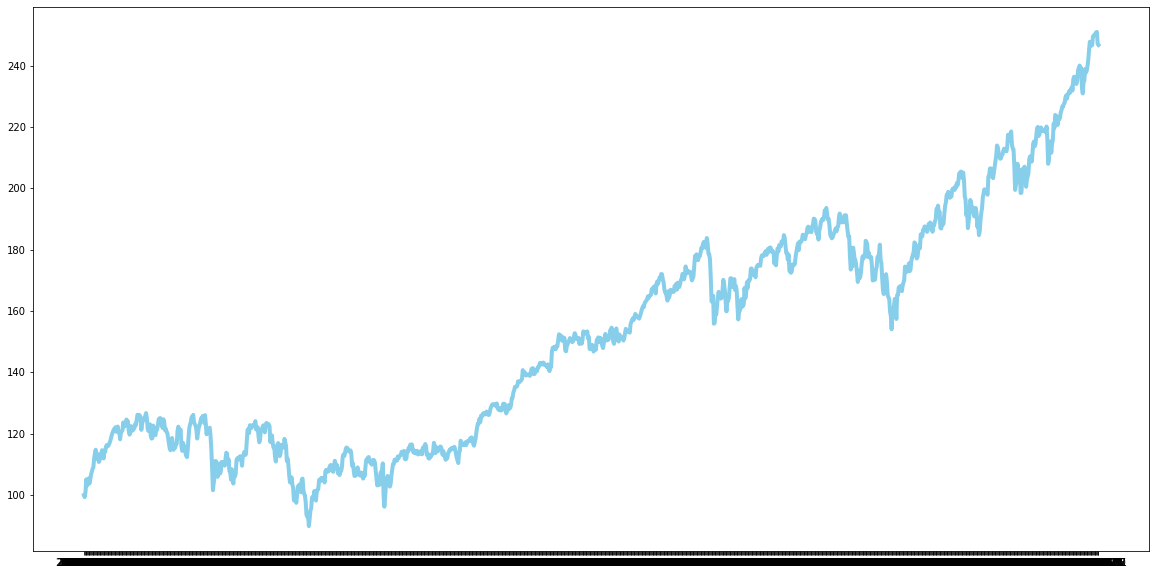

In [15]:
plt.figure(figsize=(20,10))
plt.plot(final.index, final['Recommendation'], marker='', markerfacecolor='blue', markersize=12, color='skyblue', 
         linewidth=4, label ='Recommendation')

Podemos concluir que la selección de pesos para los datos en cuestión es correcta (al aplicar el mayor peso al largo que al corto plazo o viceversa, los resultados eran peores y la subida era mucho menos estable, es decir, que había más volatilidad).

In [16]:
final.to_csv('Estrategia_Recommendation_final.csv')